# Build a model to predict Tesla_stock price



## Step 1: Import all the required libraries.
-->Pandas, Sklearn, Pickle, Seaborn

In [ ]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings('ignore')

## Step 2 : Read dataset and basic details of dataset

In [2]:
#loading training data
try:
    df = pd.read_csv('Telsa_Stock.csv')
    print('Data read successfully')
except (FileNotFoundError, IOError):
    print("Wrong file or path")

Data read successfully


In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,02-Aug-17,318.94,327.12,311.22,325.89,13091462
1,01-Aug-17,323.00,324.45,316.13,319.57,8303102
2,31-Jul-17,335.50,341.49,321.04,323.47,8535136
3,28-Jul-17,336.89,339.60,332.51,335.07,4880414
4,27-Jul-17,346.00,347.50,326.29,334.46,8302405


In [4]:
# count the total number of rows and columns.
print ('The Telsa_Stock data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The Telsa_Stock data has 756 rows and 6 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    756 non-null    object 
 1   Open    756 non-null    float64
 2   High    756 non-null    float64
 3   Low     756 non-null    float64
 4   Close   756 non-null    float64
 5   Volume  756 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 35.6+ KB


We have two type of data type one is numerical and one is object. In numerical datatype we have int and float values.

In [6]:
len(df['Date'].unique()), df.shape[0]

(756, 756)

Here in this dataset uniqueness of Date column and length of the dataset both are same that means there is no sence to keep Date column

In [7]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
print("Total number of numerical(int) columns are ", len(int64_lst))
print(" Names: ", int64_lst)

Total number of numerical(int) columns are  1
 Names:  ['Volume']


In [8]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)
print("Total number of numerical(float) columns are ", len(float64_lst))
print(" Names : ", float64_lst)

Total number of numerical(float) columns are  4
 Names :  ['Open', 'High', 'Low', 'Close']


In [9]:
df = df.drop(['Date'],axis=1)

In [10]:
#count rows and columns.
print ('The new Telsa_Stock dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The new Telsa_Stock dataset has 756 rows and 5 columns


Insights--> We have total 7 features where 1 of them is integer type,1 is object type and others are float type.And Drop 'Date'.

## Step 3: Descriptive Analysis
Mean, Median, Mode, Standard Deviation, Variance, Null Values, NaN Values, Min value, Max value, Count Value, Quatilers, Correlation, Skewness.

In [11]:
df.describe(include='all')

,Open,High,Low,Close,Volume
count,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,238.501997,242.079286,234.626177,238.476759,5.090132e+06
std,41.847814,41.989773,41.248406,41.719167,2.753492e+06
min,142.320000,154.970000,141.050000,143.670000,7.102770e+05
25%,208.987500,212.560000,205.767500,208.712500,3.304122e+06
50%,230.455000,234.450000,226.665000,230.260000,4.368873e+06
75%,255.382500,258.992500,251.695000,255.530000,6.087274e+06
max,386.690000,386.990000,379.340000,383.450000,2.374241e+07


In [12]:
# Mean
df.mean()

Open      2.385020e+02
High      2.420793e+02
Low       2.346262e+02
Close     2.384768e+02
Volume    5.090132e+06
dtype: float64

In [13]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df
mean_cal(df, int64_lst)

,normal_value,zero_value
0,1,0


In [14]:
def mean_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df
mean_cal(df, float64_lst)

,normal_value,zero_value
0,4,0


In [15]:
# Mode
df.mode()

,Open,High,Low,Close,Volume
0,220.0,188.52,185.0,210.09,710277
1,NaN,188.89,203.0,NaN,1333518
2,NaN,191.47,215.0,NaN,1422335
3,NaN,192.00,NaN,NaN,1554979
4,NaN,194.49,NaN,NaN,1615961
...,...,...,...,...,...
751,NaN,NaN,NaN,NaN,16464952
752,NaN,NaN,NaN,NaN,17046701
753,NaN,NaN,NaN,NaN,17261435
754,NaN,NaN,NaN,NaN,19324495


In [16]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in int64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df
mode_cal(df, int64_lst)

,normal_value,zero_value,string_value
0,1,0,0


In [17]:

def mode_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in float64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df
mode_cal(df, float64_lst)

,normal_value,zero_value,string_value
0,4,0,0


In [18]:
# Median
df.median()

Open          230.455
High          234.450
Low           226.665
Close         230.260
Volume    4368873.000
dtype: float64

In [19]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

median_cal(df, int64_lst)

,normal_value,zero_value
0,1,0


In [20]:
def median_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df


median_cal(df, float64_lst)

,normal_value,zero_value
0,4,0


In [21]:
# Null Values
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [23]:
# Nan values
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [24]:
#Standard Deviation
df.std()

Open      4.184781e+01
High      4.198977e+01
Low       4.124841e+01
Close     4.171917e+01
Volume    2.753492e+06
dtype: float64

In [25]:
def std_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df
std_cal(df, int64_lst)

,normal_value,zero_value
0,1,0


In [29]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df
std_cal(df, float64_lst)

,normal_value,zero_value
0,4,0


In [26]:
#Varience
df.var()

Open      1.751240e+03
High      1.763141e+03
Low       1.701431e+03
Close     1.740489e+03
Volume    7.581716e+12
dtype: float64

In [28]:
zero_cols = []

def var_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df
var_cal(df, int64_lst)

,normal_value,zero_value
0,1,0


In [30]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df
var_cal(df, float64_lst)

,normal_value,zero_value
0,4,0


In [31]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [32]:
int64_cols = ['int64']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)

In [33]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Volume,2.0003,positive (+ve) skewed


In [34]:
def right_nor_left(df, float64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in float64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [35]:
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [36]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Open,1.1602,positive (+ve) skewed
1,High,1.1757,positive (+ve) skewed
2,Low,1.0966,positive (+ve) skewed
3,Close,1.1298,positive (+ve) skewed


In [37]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,4,0,0


With the statistical analysis we have found that the data have all column positiveskew while all of the columns have non-zero varience

## Step 4: Data Exploration
-->Histogram of all columns to check the distrubution of the columns
-->Distplot or distribution plot of all columns to check the variation in the data distribution
-->Heatmap to calculate correlation 
-->Boxplot to find out outlier 

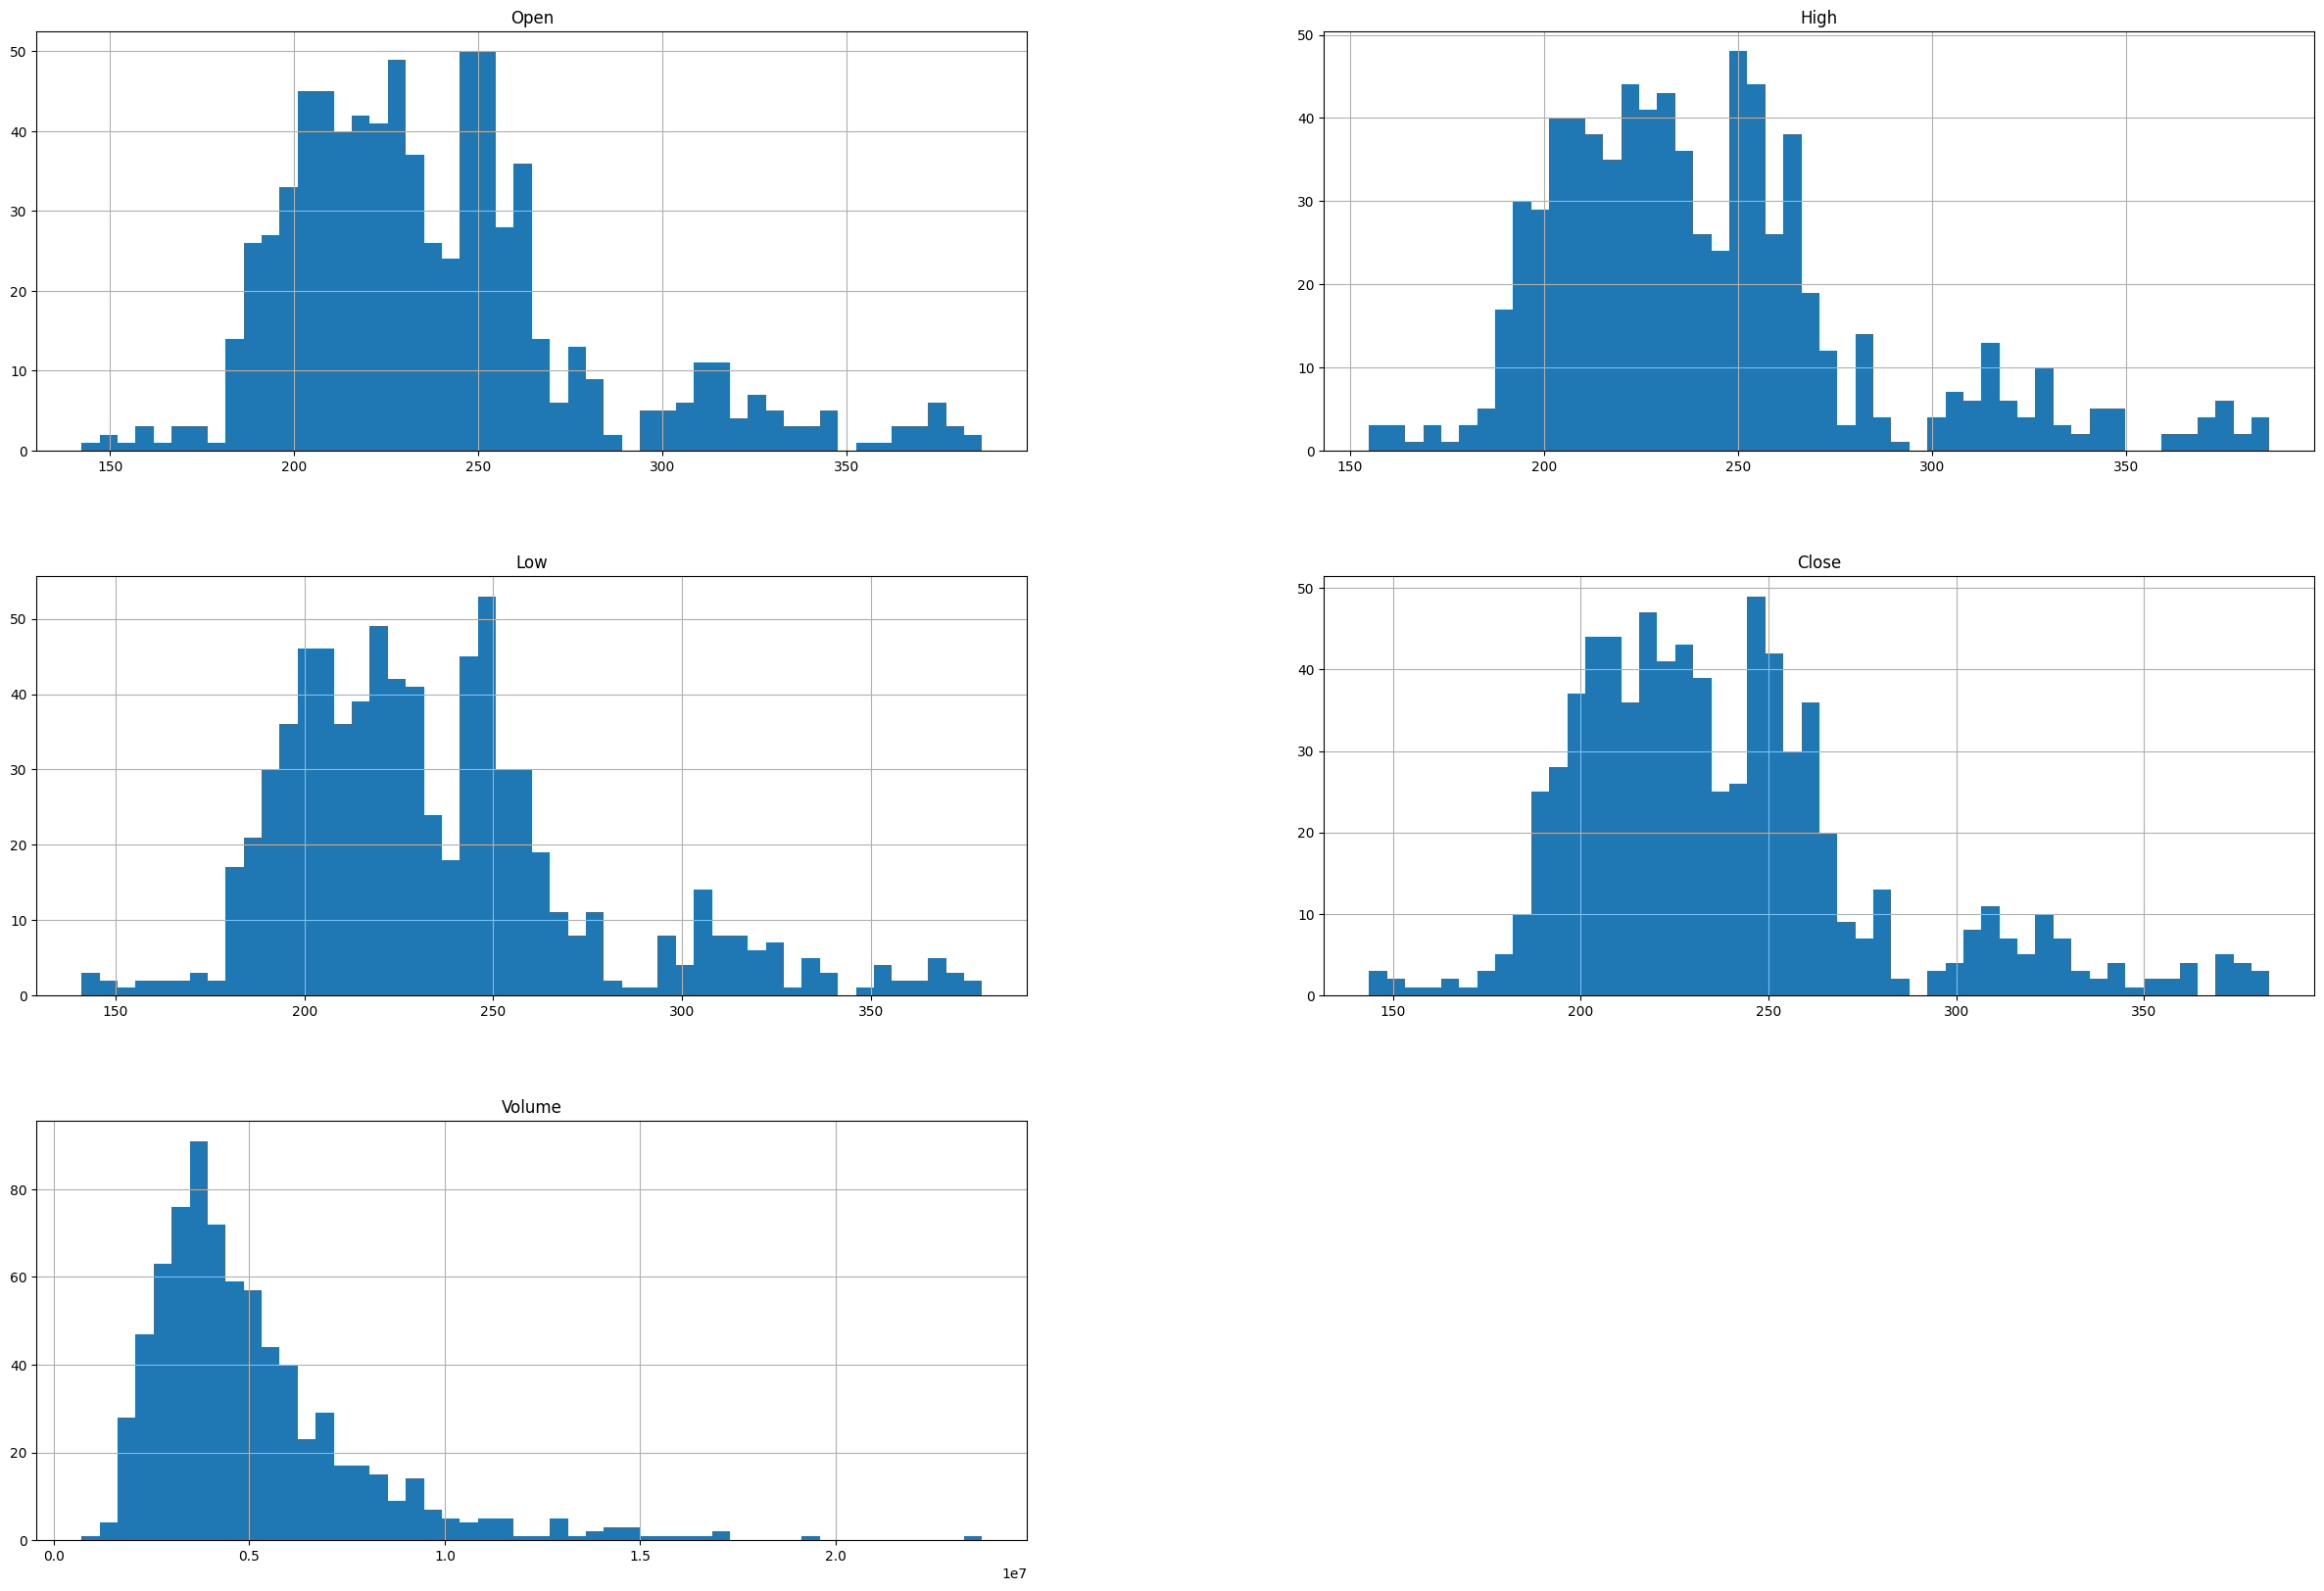

In [38]:
# Histogram
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,20))
plt.show()

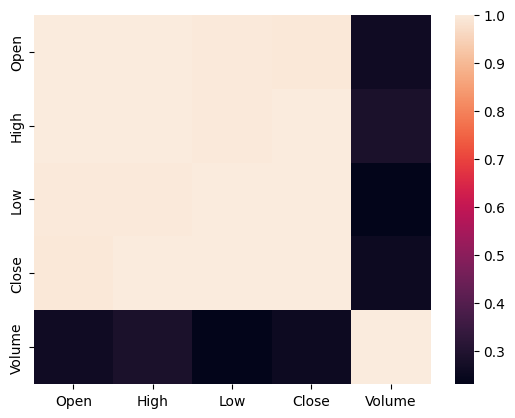

In [39]:
# Heatmap
corr = df.corr().abs()
sns.heatmap(corr)
plt.show()

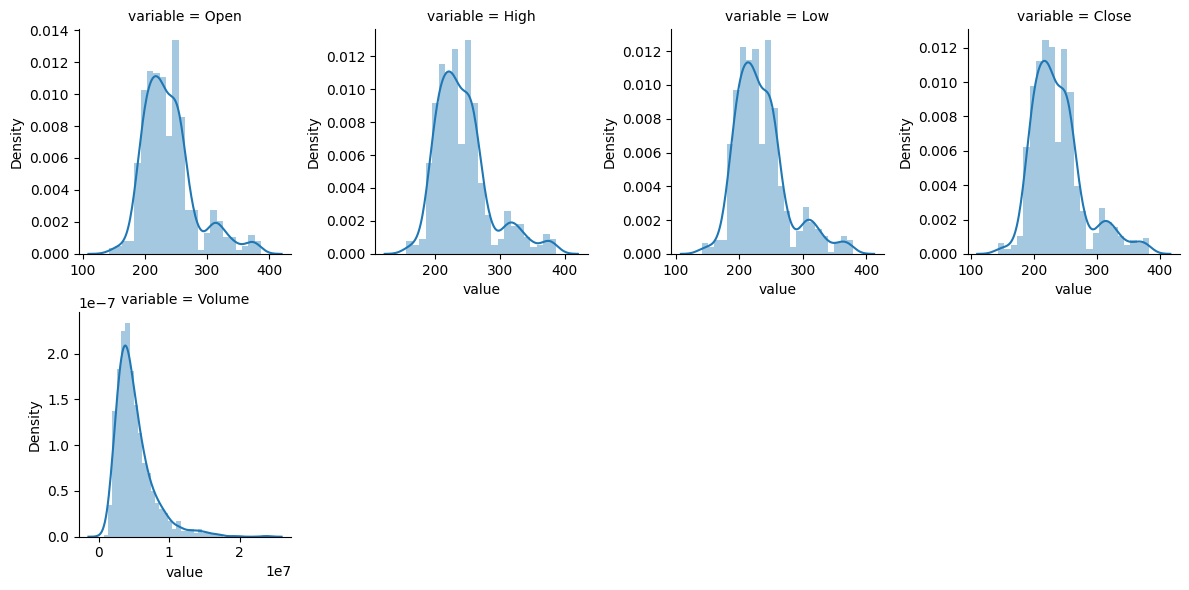

In [40]:
# Distplot
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [41]:
corr


,Open,High,Low,Close,Volume
Open,1.000000,0.997001,0.996442,0.992930,0.262868
High,0.997001,1.000000,0.996237,0.997078,0.285823
Low,0.996442,0.996237,1.000000,0.997134,0.231049
Close,0.992930,0.997078,0.997134,1.000000,0.256212
Volume,0.262868,0.285823,0.231049,0.256212,1.000000


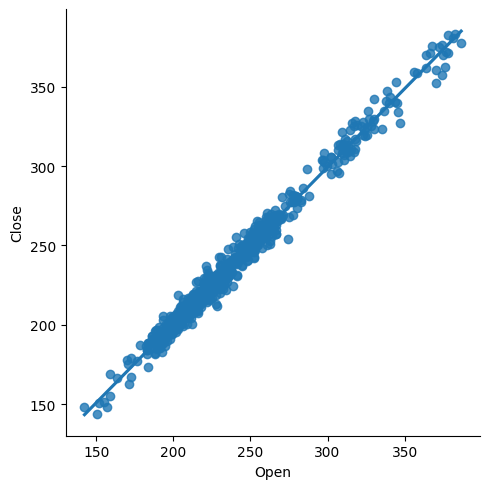

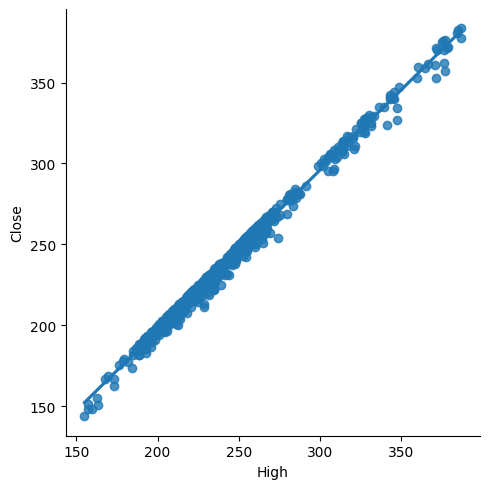

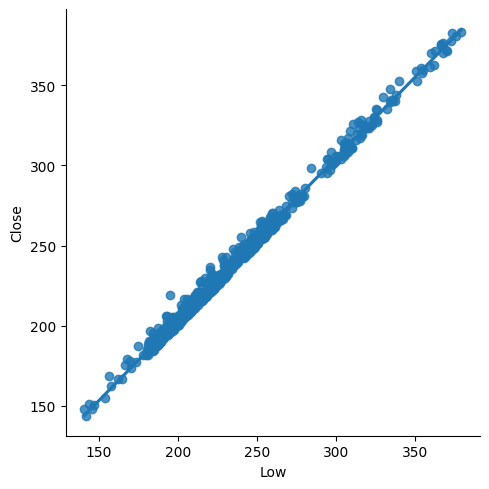

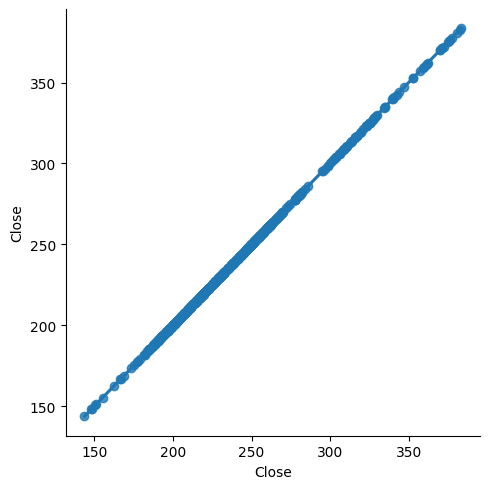

In [42]:
for value in float64_lst_col:
    sns.lmplot(x=value, y="Close", data=df);

plt.show()


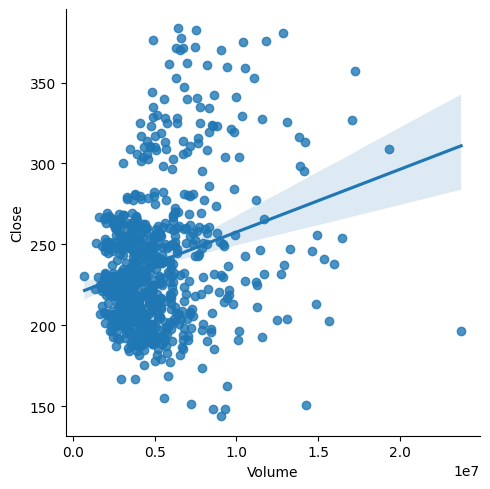

In [43]:
for value in int64_lst_col:
    sns.lmplot(x=value, y="Close", data=df);

plt.show()

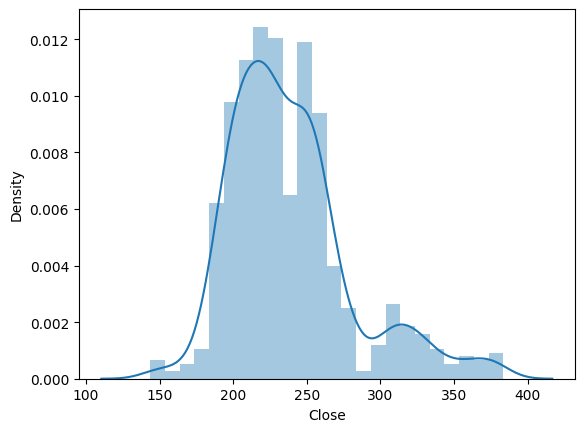

In [44]:
sns.distplot(df['Close'])
plt.show()

In [45]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['High', 'Low', 'Close']

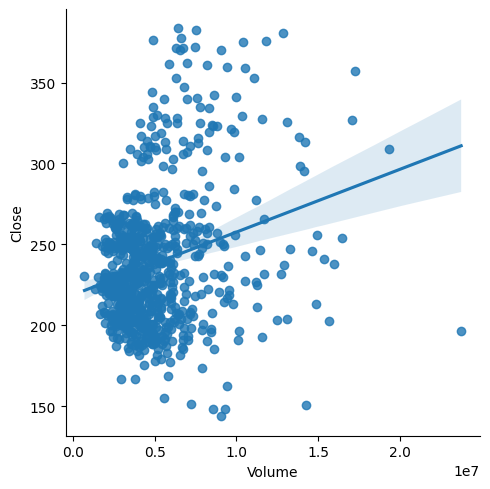

In [46]:
for value in int64_lst_col:
    sns.lmplot(x=value, y="Close", data=df);

plt.show()

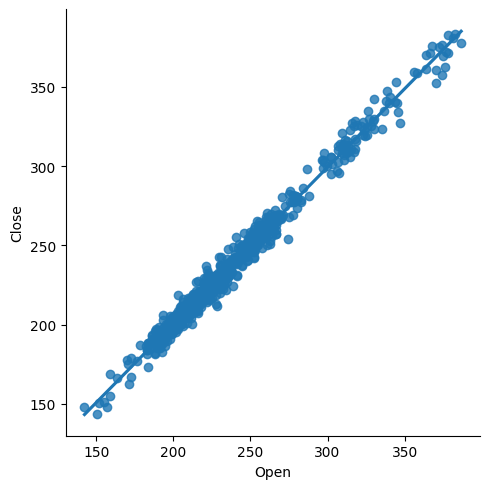

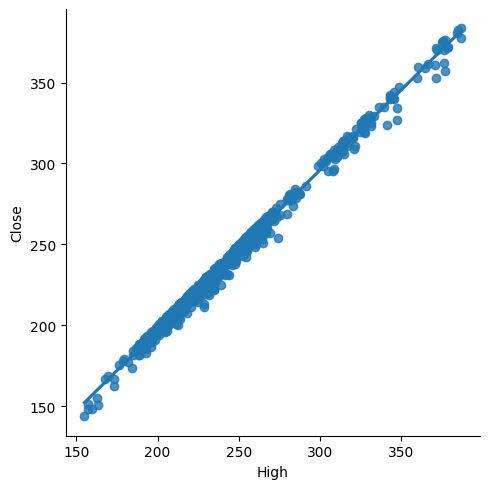

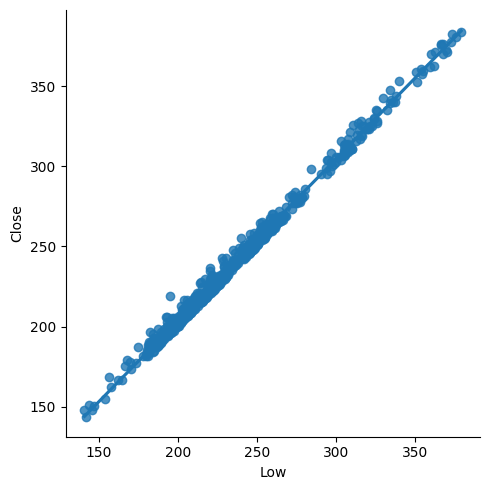

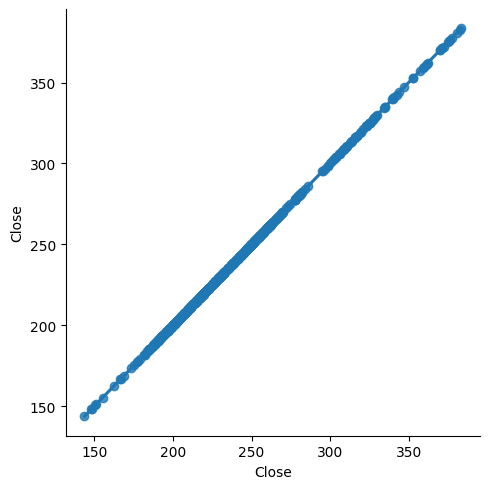

In [48]:
for value in float64_lst_col:
    sns.lmplot(x=value, y="Close", data=df);
plt.show()

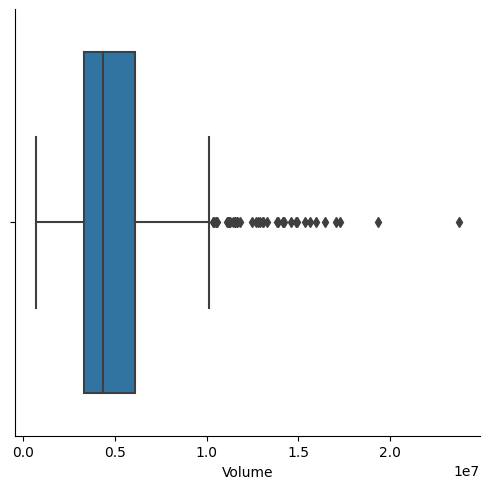

In [49]:
# Boxplot
for value in int64_lst_col:
    sns.catplot(data=df, x=value, kind="box")   
plt.show()

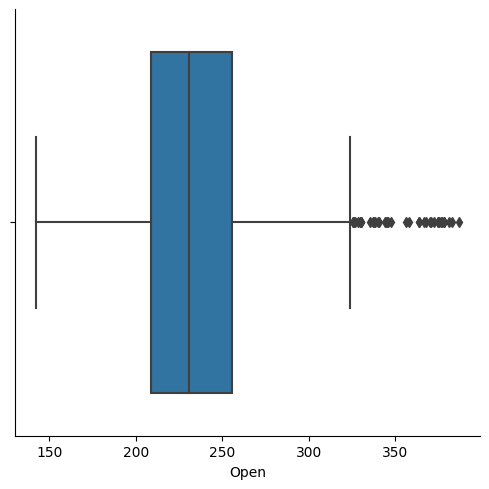

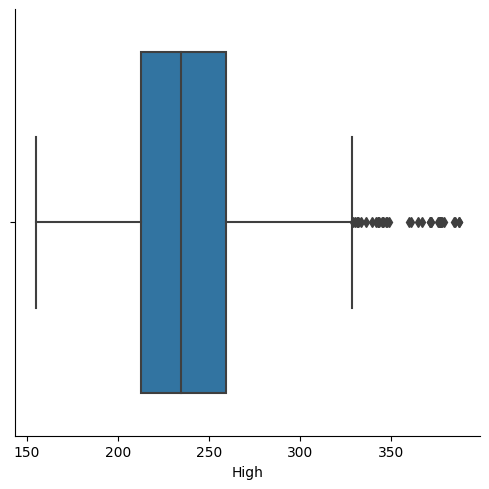

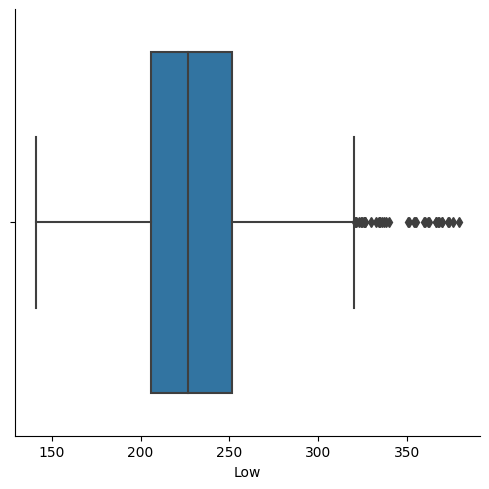

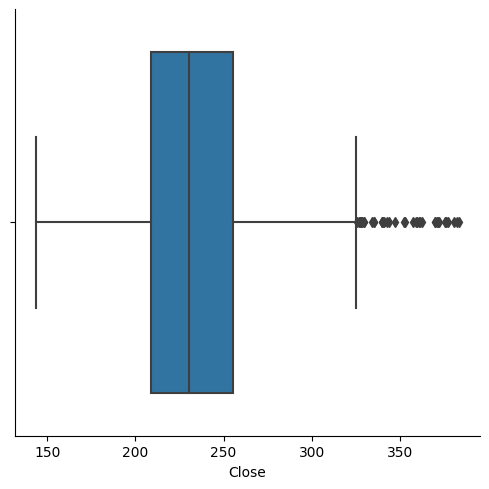

In [50]:

for value in float64_lst_col:
    sns.catplot(data=df, x=value, kind="box")    
plt.show()

In this we confirmed that about skewness of the columns, there are 3 columns which have more than 0.8 correlation value between them and also found the some columns have outliers.